<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/Lab5_Python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В першу чергу імпортуємо необхідні бібліотеки:

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Додаємо наш датасет:

In [ ]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo'
output = '/content/BigMart_Sales_Data.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo
To: /content/BigMart_Sales_Data.csv
100%|██████████| 526k/526k [00:00<00:00, 24.6MB/s]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Переглянемо коротку довідку про датасет:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Датасет має: 5681 рядок, 11 колонок, 3 бульові значення, 1 int64 і 7 об'єктів.

Короткий опис назв стовпців:
1. Item_Identifier - Ідентифікатор_товару
2. Item_Weight - Вага_товару
3. Item_Fat_Content - Вміст_жиру_товару
4. Item_Visibility - Видимість_товару
5. Item_Type - Тип_товару
6. Item_MRP - Максимальна_роздрібна_ціна_товару
7. Outlet_Identifier - Ідентифікатор_магазину
8. Outlet_Establishment_Year - Рік_заснування_магазину
9. Outlet_Size - Розмір_магазину
10. Outlet_Location_Type - Тип_розташування_магазину
11. Outlet_Type - Тип_магазину

Для зручності перейменуємо назви стовпців в датасеті

In [ ]:
df.rename(columns={'Item_Identifier': 'item_identifier',
                   'Item_Weight':'item_weight',
                   'Item_Fat_Content':'item_fat_content',
                   'Item_Visibility':'item_visibility',
                   'Item_Type':'item_type',
                   'Item_MRP':'item_mrp',
                   'Outlet_Identifier':'outlet_identifier',
                   'Outlet_Establishment_Year':'outlet_establishment_year',
                   'Outlet_Size':'outlet_size',
                   'Outlet_Location_Type':'outlet_location_type',
                   'Outlet_Type':'outlet_type'},inplace=True)

In [ ]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Перевіримо, чи є в датасеті NaN елементи (пропуски в даних):

In [ ]:
df.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

В даному датасеті є чимало NaN елементів, які варто видалити або заповнити

In [ ]:
df = df.dropna()

Перевіримо, чи є в датасеті залишились NaN елементи (пропуски в даних):

In [ ]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

В датасеті було успішно видалені NaN елементи.

**Розвідувальний аналіз даних**

In [ ]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


Будуємо коробчасту діаграму для показника "item_mrp":

<Axes: >

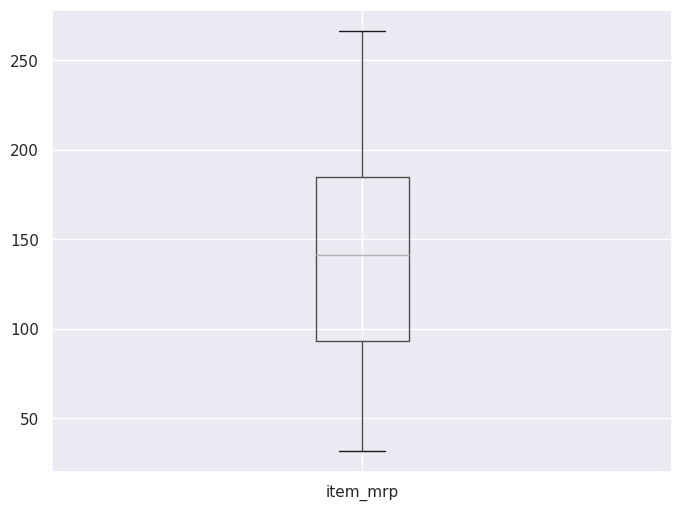

In [ ]:
df[['item_mrp']].boxplot(figsize=(8,6))

Я обрала не видаляти данні, так як не бачу сильних викидів в датасеті.

Будуємо коробчасту діаграму для показника "item_visibility":

<Axes: >

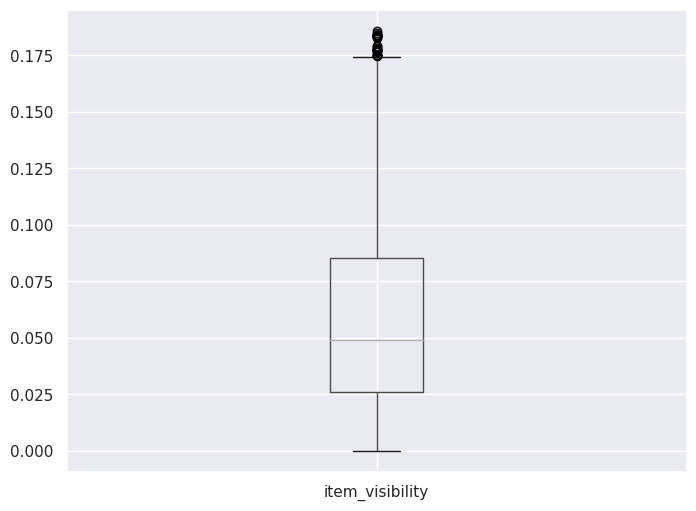

In [ ]:
df[['item_visibility']].boxplot(figsize=(8,6))

Видаляю інформацію про коеф. видимості товару, який вище за 0.175(значення найбільше відрізняються від інших):

In [ ]:
df.drop(df[df['item_visibility'] > 0.175].index, inplace=True)

Будуємо коробчасту діаграму для показника "item_weight":

<Axes: >

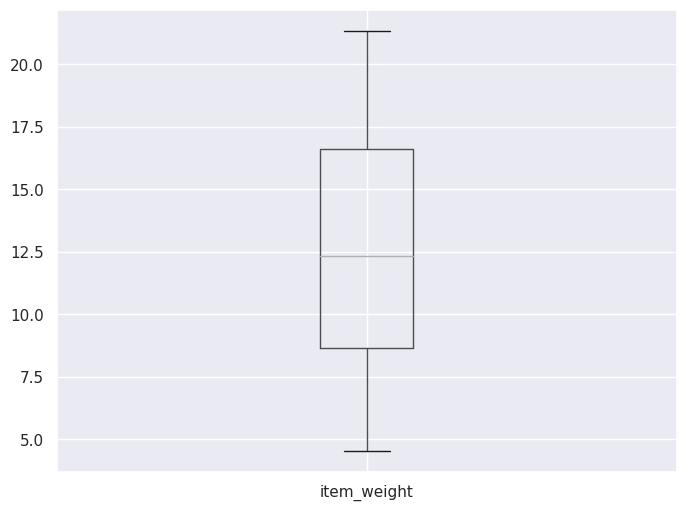

In [ ]:
df[['item_weight']].boxplot(figsize=(8,6))

Я обрала не видаляти данні, так як не бачу сильних викидів в датасеті.

Будуємо коробчасту діаграму для показника "outlet_establishment_year":

<Axes: >

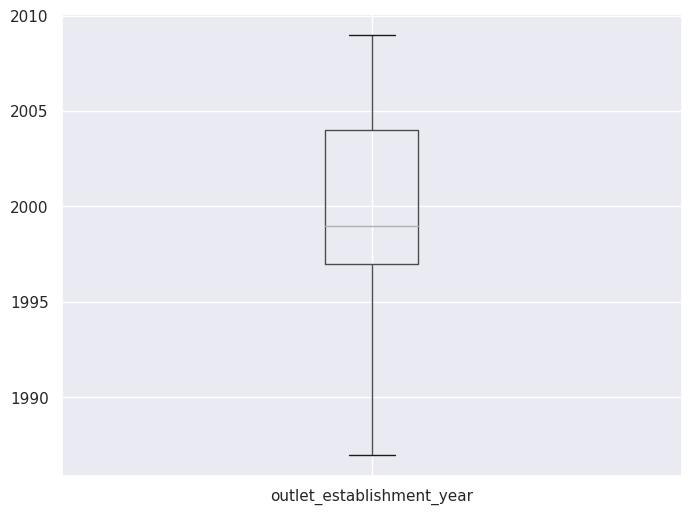

In [ ]:
df[['outlet_establishment_year']].boxplot(figsize=(8,6))

Видаляю інформацію про рік створення компанії, які засновані до 1990 (значення найбільше відрізняються від інших)

In [ ]:
df.drop(df[df['outlet_establishment_year'] < 1990].index, inplace=True)

Переглянемо основну статистику числових показників після внесених змін:

Перекодуємо дані в стовпці "outlet_location_type" та "item_fat_content" в числові:

In [ ]:
df.outlet_location_type = df.outlet_location_type.replace ({'Tier 1': 1,
                                                            'Tier 2': 2,
                                                            'Tier 3': 3})
df['item_fat_content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)
df.item_fat_content = df.item_fat_content.replace({'Regular': '1', 'Low Fat': '0'})
df.outlet_type = df.outlet_type.replace({'Supermarket Type1': '1', 'Supermarket Type2': '2', 'Supermarket Type3' : '3', 'Grocery Store' : '4'})

Після змін датасет має такий вигляд (перші 5 записів):

In [ ]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [ ]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                   object
dtype: object

Змінимо тип даних в стовпцях, які ми щойно змінювали:

In [ ]:
df.outlet_location_type = df.outlet_location_type.astype(int)
df.item_fat_content = df.item_fat_content.astype(int)
# df.outlet_size = df.outlet_size.astype(int)
df.outlet_type = df.outlet_type.astype(int)
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [ ]:
X = df.drop('item_mrp', axis=1)
X.shape

(2461, 10)

Залежною змінною Y для майбутніх моделей класифікації було обрано outlet_size:

In [ ]:
Y = df['item_mrp']

In [ ]:
# Імпортуємо функцію для розбиття даних на навчальний і тестовий набори:
from sklearn.model_selection import train_test_split

# Вибираємо всі стовпці, окрім 'item_mrp', які будемо використовувати як ознаки
X = df.drop('item_mrp', axis=1)
Y = df['item_mrp']

# Імпортуємо функцію для розділення даних на навчальний і тестовий набори:
from sklearn.model_selection import train_test_split

# Розділяємо дані на тренувальний, валідаційний та тестовий набори:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)

In [ ]:
# Перевіряємо розміри наборів даних:
# Виводимо розмір набору ознак для тренування (X_train):
print("Shape of X_train: ", X_train.shape)

# Виводимо розмір набору цільової змінної для тренування (Y_train):
print("Shape of Y_train: ", Y_train.shape)

# Виводимо розмір набору ознак для валідації (X_validation):
print("Shape of X_validation: ", X_validation.shape)

# Виводимо розмір набору цільової змінної для валідації (Y_validation):
print("Shape of Y_validation: ", Y_validation.shape)

# Виводимо розмір набору ознак для тестування (X_test):
print("Shape of X_test: ", X_test.shape)

# Виводимо розмір набору цільової змінної для тестування (Y_test):
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1968, 10)
Shape of Y_train:  (1968,)
Shape of X_validation:  (394, 10)
Shape of Y_validation:  (394,)
Shape of X_test:  (99, 10)
Shape of Y_test:  (99,)


In [ ]:
# Створюємо DataFrame для тренувального набору даних:
X_train = pd.DataFrame(X_train)
Y_train = pd.Series(Y_train)

# Створюємо DataFrame для валідаційного набору даних:
X_validation = pd.DataFrame(X_validation)
Y_validation = pd.Series(Y_validation)

# Створюємо DataFrame для тестового набору даних:
X_test = pd.DataFrame(X_test)
Y_test = pd.Series(Y_test)

In [ ]:
# Describe the training matrix
X_train.describe()

,item_weight,item_fat_content,item_visibility,outlet_establishment_year,outlet_location_type,outlet_type
count,1968.000000,1968.00000,1968.000000,1968.000000,1968.000000,1968.000000
mean,12.730379,0.35315,0.057768,2002.267276,1.752033,1.251016
std,4.592392,0.47807,0.042856,4.655461,0.829977,0.433708
min,4.590000,0.00000,0.000000,1997.000000,1.000000,1.000000
25%,8.785000,0.00000,0.025238,1999.000000,1.000000,1.000000
50%,12.500000,0.00000,0.047686,2004.000000,2.000000,1.000000
75%,16.600000,1.00000,0.083872,2009.000000,3.000000,2.000000
max,21.350000,1.00000,0.174758,2009.000000,3.000000,2.000000


In [ ]:
# Виводимо перші п'ять записів з набору цільової змінної для тренування (Y_train):
Y_train.head()

2284    143.5154
343     233.1958
73      245.2486
1399     55.5298
2566     34.3558
Name: item_mrp, dtype: float64

In [ ]:
# Імпортуємо необхідні бібліотеки: KNNImputer для заповнення відсутніх значень та StandardScaler для масштабування даних:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Вибираємо числові ознаки для масштабування та обробки відсутніх значень
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Застосовуємо KNNImputer для обробки відсутніх значень та масштабуємо числові ознаки
X_train[numeric_features] = imputer.fit_transform(X_train[numeric_features])
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

X_validation[numeric_features] = imputer.transform(X_validation[numeric_features])
X_validation_scaled = scaler.transform(X_validation[numeric_features])

X_test[numeric_features] = imputer.transform(X_test[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

### Побудова моделей зниження розмірностей

#### 1. Стандартний метод аналізу головних компонентів (PCA, Principal component analysis)

PCA, або Principal Component Analysis (Аналіз головних компонент), є методом зменшення розмірності та виявлення головних напрямків (головних компонент) у високорозмірних даних. Основна мета PCA - зменшити кількість змінних у наборі даних, зберігаючи при цьому якнайбільше інформації.

Основні кроки PCA:

Центрулізація даних: Від кожного значення віднімається середнє значення відповідної ознаки. Це робиться для того, щоб нова система координат була центрована в нуль.

Розрахунок матриці коваріації: Коваріація між двома ознаками вказує на те, як вони змінюються разом. Матриця коваріації містить коваріації між всіма парами ознак.

Розрахунок власних значень та власних векторів: Власні значення та власні вектори матриці коваріації вказують на головні напрямки та важливість кожного напрямку.

Вибір головних компонент: Головні компоненти - це напрямки у просторі даних, які визначаються власними векторами матриці коваріації. Головний компонент з вищим власним значенням вказує на більшу дисперсію та, отже, більшу важливість.

Проекція на новий простір: Обчислення нових значень для кожного спостереження в новому просторі, побудованому на основі головних компонент.

PCA часто використовується для візуалізації та зменшення розмірності даних в різних галузях, таких як комп'ютерний зір, обробка сигналів та машинне навчання. Він допомагає виявляти головні фактори, що впливають на дані, та зменшувати кількість змінних, зберігаючи при цьому інформацію.

In [ ]:
# Імпортуємо необхідну бібліотеку для PCA:
from sklearn.decomposition import PCA

# Визначаємо кількість головних компонентів:
n_components = min(20, X_train_scaled.shape[1])

# Встановлюємо параметри PCA:
whiten = False
random_state = 2018

# Створюємо об'єкт PCA:
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

# Застосовуємо PCA до тренувального набору даних:
X_train_scaled_PCA = pca.fit_transform(X_train_scaled)

# Створюємо DataFrame з результатами PCA:
X_train_scaled_PCA = pd.DataFrame(data=X_train_scaled_PCA)

In [ ]:
# Виводимо загальний відсоток варіативності даних, яку пояснюють всі 20 головних компонентів, використаних у PCA:
print("Варіативність, пояснена всіма 20 головними компонентами: ", \
      sum(pca.explained_variance_ratio_))

Варіативність, пояснена всіма 20 головними компонентами:  1.0000000000000002


In [ ]:
# Відсоток варіативності, поясненої головними компонентами:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

# Виводимо варіативність, пояснену першими 2 головними компонентами:
print('Варіативність, пояснена першими 2 головними компонентами: ',
      importanceOfPrincipalComponents.loc[:,0:2].sum(axis=1).values)

# Виводимо варіативність, пояснену першими 3 головними компонентами:
print('Варіативність, пояснена першими 3 головними компонентами: ',
      importanceOfPrincipalComponents.loc[:,0:3].sum(axis=1).values)

# Виводимо варіативність, пояснену першими 4 головними компонентами:
print('Варіативність, пояснена першими 4 головними компонентами: ',
      importanceOfPrincipalComponents.loc[:,0:4].sum(axis=1).values)

# Виводимо варіативність, пояснену першими 5 головними компонентами:
print('Варіативність, пояснена всіма 7 головними компонентами: ',
      importanceOfPrincipalComponents.loc[:,0:7].sum(axis=1).values)

Варіативність, пояснена першими 2 головними компонентами:  [0.80950196]
Варіативність, пояснена першими 3 головними компонентами:  [0.96644887]
Варіативність, пояснена першими 4 головними компонентами:  [0.99826681]
Варіативність, пояснена всіма 7 головними компонентами:  [1.]


Висновок:

Аналізуючи варіативність, пояснену різними кількостями головних компонентів, можна зробити важливі висновки щодо розподілу даних у вивченому просторі. Починаючи від двох головних компонентів, ми вже спостерігаємо значну частку варіативності, яка складає 80.95%. Додавання третього компонента ще більше покращує наше розуміння, пояснюючи практично 97% варіативності.

Знаходження четвертого головного компонента ще більше підвищує нашу здатність пояснити дані, вже до 99.83%. Це свідчить про те, що більшість інформації у наборі даних концентрується в обмеженій кількості головних компонентів.

Однак, додавання всіх семи головних компонентів дозволяє пояснити повну варіативність даних, що досягає 100%. Це може свідчити про складні взаємозв'язки та важливі аспекти, які можуть бути виявлені лише за допомогою всіх доступних головних компонентів. Такий підхід може бути корисним для глибшого розуміння структури даних та виявлення складних патернів, що визначають їхню природу.

<Axes: >

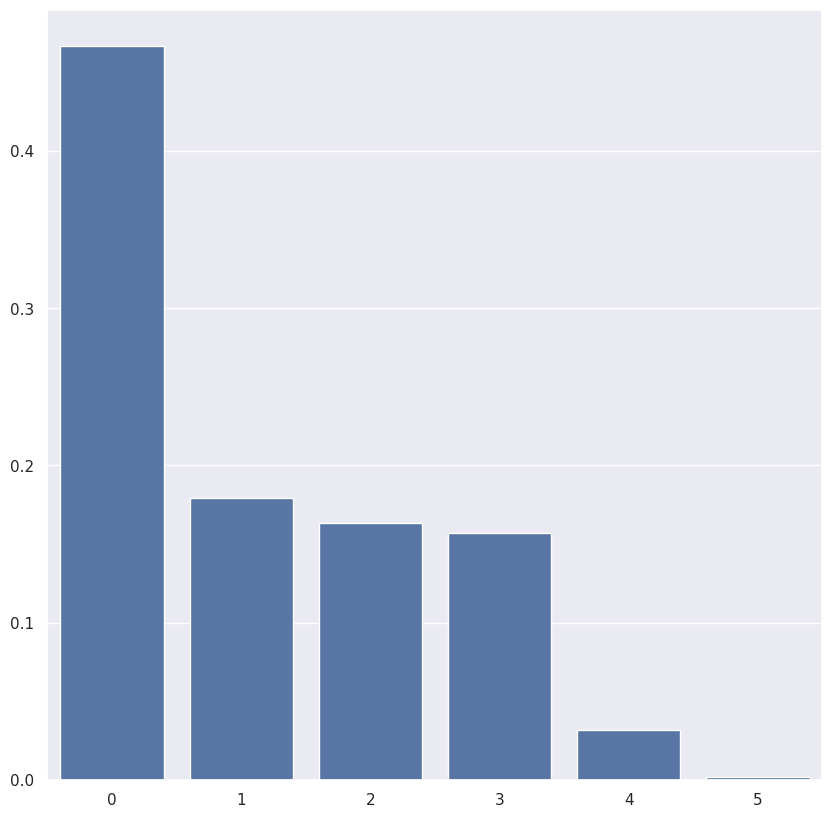

In [ ]:
# Налаштовуємо візуальний стиль та розмір графіка за допомогою бібліотеки Seaborn:
sns.set(rc={'figure.figsize':(10,10)})

# Створюємо стовпчиковий графік (bar plot) для перших 10 головних компонентів, використаних у PCA:
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9], color='b')

На підставі цього графіка можна вирішити, скільки головних компонентів варто використовувати для подальшого аналізу або моделювання. Якщо метою є зниження розмірності з мінімальною втратою інформації, можна вибрати кількість компонентів так, щоб сумарна варіативність була достатньо високою (наприклад, 90-95%).
Якщо ціль дослідження — зберегти якнайбільше інформації, можна вибрати 4 компонентів, оскільки вони захоплюють понад 90% варіативності.
Якщо ми шукаємо баланс між зниженням розмірності та збереженням інформації, варто розглянути використання 3 компонентів, які захоплюють майже 70% варіативності. Це може бути достатньо для багатьох застосувань, особливо якщо наступні компоненти додають лише невеликий відсоток до поясненої варіативності.
У випадку, коли компоненти, що йдуть після 4-го, додають відносно мало до загальної варіативності, може бути розумно зупинитися на 4 компонентах, щоб зменшити складність моделі та уникнути перенавчання.


In [ ]:
def scatterPlot(xDF, yDF, algoName):
    # Створюємо тимчасовий DataFrame з перших двох головних компонентів:
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)

    # Додаємо цільову змінну (Label) до даних:
    tempDF = pd.concat((tempDF, yDF), axis=1, join="inner")

    # Перейменуємо стовпці для зручності візуалізації:
    tempDF.columns = ["First Vector", "Second Vector", "Label"]

    # Створюємо розсіювальний графік з використанням Seaborn:
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False, legend=False)

    # Налаштовуємо заголовок графіка з назвою використаного алгоритму:
    ax = plt.gca()
    ax.set_title("Розділення спостережень за допомогою " + algoName)

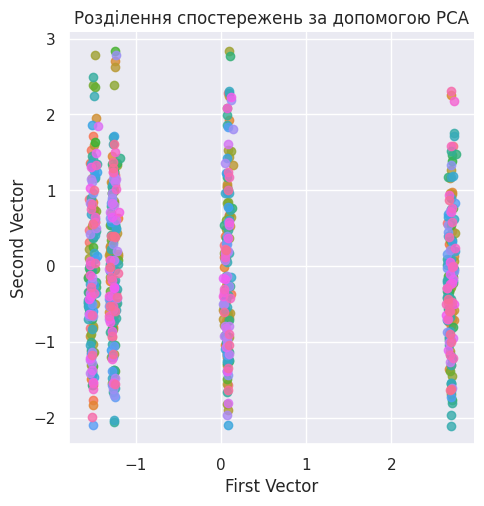

In [ ]:
# Візуалізуємо результати PCA:
scatterPlot(X_train_scaled_PCA, Y_train, "PCA")

Text(0.5, 1.0, 'Розділення спостережень за допомогою початкового набору ознак')

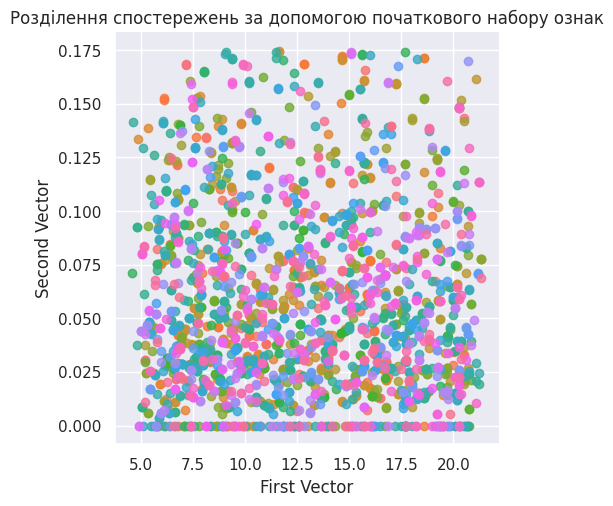

In [ ]:
# Створюємо новий DataFrame з двома обраними стовпцями та додаванням цільової змінної:
X_train_scatter = pd.DataFrame(data=X_train.iloc[:, [1, 3]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter, Y_train), axis=1, join="inner")

# Перейменовуємо стовпці для зручності візуалізації:
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]

# Створюємо розсіювального графіка з використанням Seaborn:
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False, legend=False)

# Налаштовуємо заголовок графіка:
ax = plt.gca()
ax.set_title("Розділення спостережень за допомогою початкового набору ознак")

Цей код створює розсіювальний графік, на якому дані розділені за допомогою PCA, із використанням зазначених даних та назви алгоритму "PCA" в якості заголовку графіка. Він допомагає візуалізувати, як головні компоненти впливають на розподіл даних за цільовою змінною.

In [ ]:
X_train_scatter.head


<bound method NDFrame.head of       First Vector  Second Vector     Label
2284        10.500       0.013517  143.5154
343         19.500       0.000000  233.1958
73           7.810       0.067560  245.2486
1399        11.650       0.174320   55.5298
2566        13.650       0.039987   34.3558
...            ...            ...       ...
3796        17.000       0.139739  266.4884
2553         9.695       0.130200  186.7898
2635        17.250       0.047257   97.0068
3049        11.350       0.063484   85.9856
2023        20.700       0.100156  125.7388

[1968 rows x 3 columns]>

#### 2. Стохастичне вкладення сусідів з t-розподілом (t-SNE, t- distributed stochastic neighbor embedding)

t-SNE (t-distributed Stochastic Neighbor Embedding) - це алгоритм зменшення розмірності для візуалізації високорозмірних даних в простір меншої розмірності, зазвичай двовимірний (2D) простір. Алгоритм був запропонований Лоренсом ван дер Маатеном та Джеффрі Хінтоном у 2008 році.

Основна ідея t-SNE полягає в тому, щоб зберігати подібні об'єкти разом та відділяти відмінні. Процес розташування об'єктів у новому просторі базується на ймовірностях подібності між парами об'єктів у високорозмірному та зменшеному просторах.

Особливістю t-SNE є те, що він намагається зберігати відносної близькість точок у високорозмірному просторі, що робить його ефективним для виявлення локальних структур у даних.

t-SNE часто використовується для візуалізації складних структур даних, таких як образи, аудіо та тексти, і для виявлення кластерів об'єктів у високорозмірних просторах.

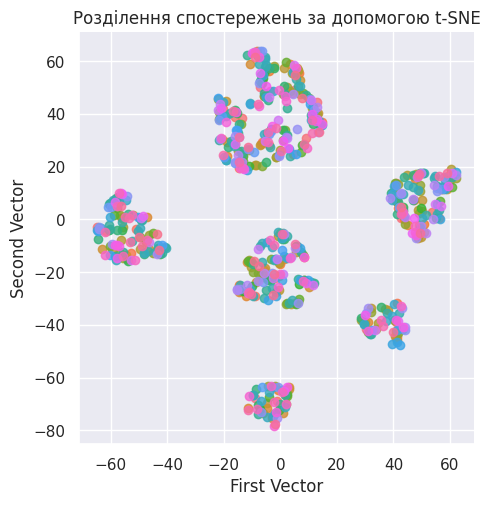

In [ ]:
# Імпортуємо необхідний клас для використання алгоритму t-SNE:
from sklearn.manifold import TSNE

# Задаємо параметри алгоритму t-SNE:
n_components = 2  # кількість головних компонент, до яких зменшується розмірність
learning_rate = 300  # швидкість навчання
perplexity = 30  # керування збереженістю сусідніх точок
early_exaggeration = 12  # Ппідвищення віддаленості між точками
init = 'random'  # початкова ініціалізація випадковими значеннями
random_state = 2018  # випадкове початкове значення для відтворюваності результатів

# Ініціалізуємо об'єкт t-SNE з заданими параметрами:
tSNE = TSNE(n_components=n_components, learning_rate=learning_rate,
            perplexity=perplexity, early_exaggeration=early_exaggeration,
            init=init, random_state=random_state)

# Виконуємо зниження розмірності для даних X_train_PCA:
X_train_tSNE = tSNE.fit_transform(X_train_scaled_PCA.loc[:5000,:9])

# Створюємо DataFrame на основі отриманих зменшених даних для подальшої візуалізації:
X_train_tSNE = pd.DataFrame(data=X_train_tSNE)

# Викликаємо функцію scatterPlot для відображення результатів зниження розмірності:
scatterPlot(X_train_tSNE, Y_train, "t-SNE")

Висновок: У цій лабораторній роботі було проведено дослідження зниження розмірності та візуалізації даних за допомогою методів PCA і t-SNE на основі заданого набору даних.

Для методу PCA було визначено оптимальну кількість головних компонент, яку слід використовувати для збереження більшості варіативності даних. За допомогою аналізу дисперсії, було встановлено, що перші 5 головних компонент захоплюють більше 90% варіативності, що дозволяє знизити розмірність даних, зберігаючи при цьому важливу інформацію.

Далі було виконано візуалізацію даних за допомогою методу t-SNE з використанням перших 4 головних компонент. Відзначено, що цей метод дозволяє створити двовимірне представлення даних, яке зберігає важливі взаємозв'язки між спостереженнями.

Аналіз отриманих даних показав, що в зниженій розмірності можна впізнати певну структуру в даних, і це може бути корисним для подальших аналізів та візуалізацій. Загалом, використання методів зниження розмірності і візуалізації допомагає отримати краще розуміння структури даних та виявити можливі закономірності.


UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap

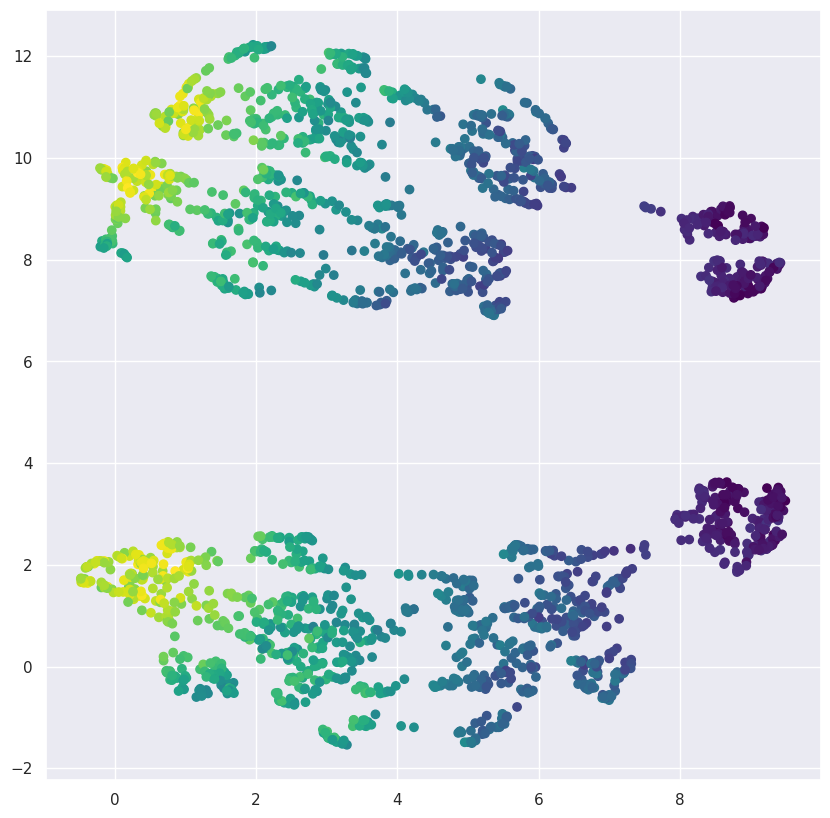

In [ ]:
# Визначте категоріальні стовпці
categorical_columns = df.select_dtypes(include=['object']).columns

# Кодування "one-hot" категоріальних стовпців
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Використовуйте UMAP на трансформованому наборі даних
embedding = umap.UMAP(n_components=2, metric='hellinger').fit_transform(df_encoded)

# Побудуйте візуалізацію вбудовування UMAP
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['item_mrp'], cmap='viridis')
plt.show()


UMAP, або Uniform Manifold Approximation and Projection, є методом для зменшення розмірності та візуалізації даних.

UMAP є ефективним методом порівняно з іншими алгоритмами зменшення розмірності, такими як t-SNE, зокрема для великих об'ємів даних. Особливістю UMAP є його здатність зберігати локальні та глобальні властивості даних, що робить його популярним інструментом для візуалізації та аналізу даних в різних галузях.